

# Task2:Prediction Using Unsupervised ML

### By:Sayed Mahmoud

## Table of Contents
<ul>
<li><a href="#import">Importing Data</a></li>
<li><a href="#visualize">Data Visualization</a></li>
<li><a href="#Model">Building Model</a></li>
<li><a href="#Ques">Visualize Model and Clusters</a></li>
</ul>

<a id='import'></a>
## Importing Data

In [11]:
#importing libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
#import data
df=pd.read_csv("Iris.csv")

In [3]:
#show data
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
#statistics information about data
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
#sheck for dupilicates
df.duplicated().sum()

0

In [7]:
x=df.drop(labels=['Id','Species'],axis=1)

In [8]:
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
x.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<a id='visualize'></a>
## Data Visualization

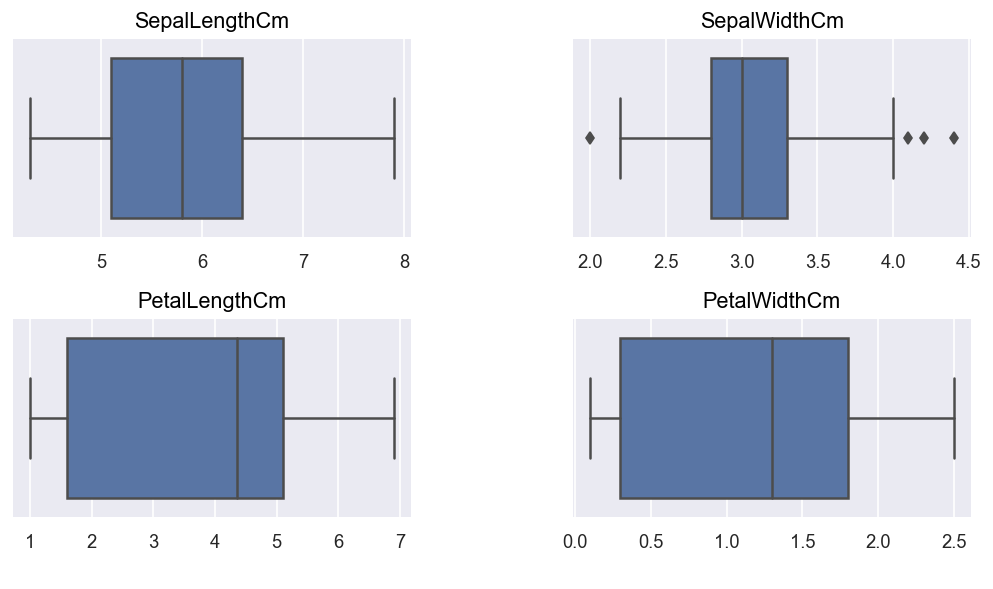

In [47]:
# make a Loop to plot the data to understand the central tendency by using boxplot

plt.figure(figsize=(10,5), dpi = 120)
sns.set()
for i in range(len(x.columns)):
    plt.subplot(2,2,i+1)
    plt.title(x.columns[i], color = 'black', fontsize = '13')
    sns.boxplot(data = x , x = x.columns[i])
    plt.xlabel(" ")
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()


>### As you see there is outliers in SepalLengthCm column so we have to remove it 

In [56]:
#removing outliers from SpelLengthCm column
q_low = x["SepalLengthCm"].quantile(0.15)
q_hi  = x["SepalLengthCm"].quantile(0.80)

x = x[(x["SepalLengthCm"] < q_hi) & (x["SepalLengthCm"] > q_low)]

<AxesSubplot:xlabel='SepalWidthCm'>

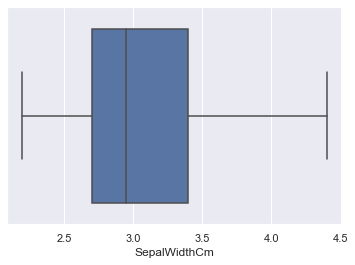

In [57]:
sns.boxplot(data = x , x = x.columns[1]);

>#### We notice that the 4 outliers have been dropped

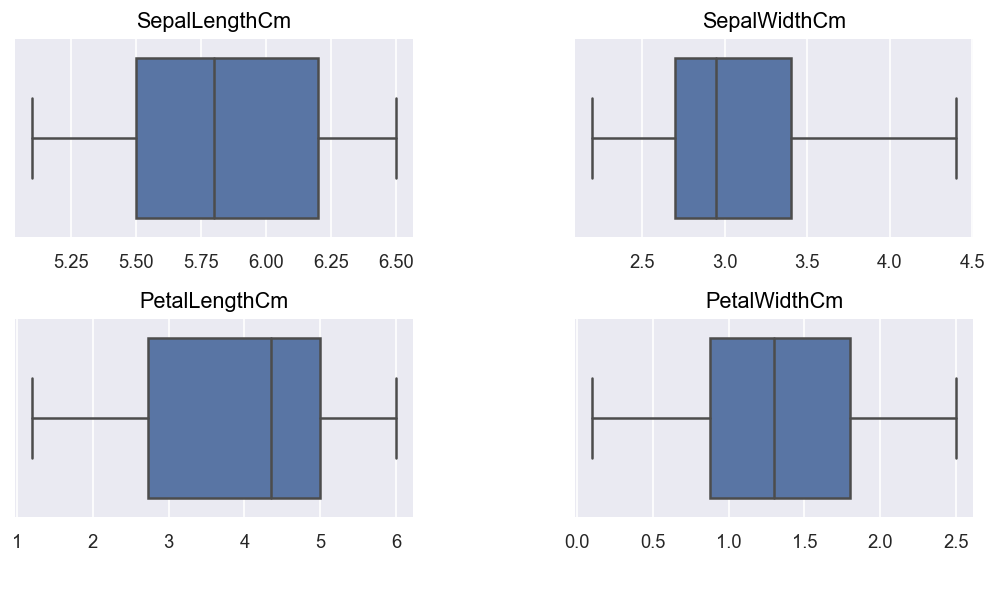

In [59]:
plt.figure(figsize=(10,5), dpi = 120)
sns.set()
for i in range(len(x.columns)):
    plt.subplot(2,2,i+1)
    plt.title(x.columns[i], color = 'black', fontsize = '13')
    sns.boxplot(data = x , x = x.columns[i])
    plt.xlabel(" ")
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()


In [75]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88 entries, 0 to 149
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  88 non-null     float64
 1   SepalWidthCm   88 non-null     float64
 2   PetalLengthCm  88 non-null     float64
 3   PetalWidthCm   88 non-null     float64
dtypes: float64(4)
memory usage: 3.4 KB


>No outliers found and now we are ready to cluster the data

<a id='Model'></a>
## Building Model

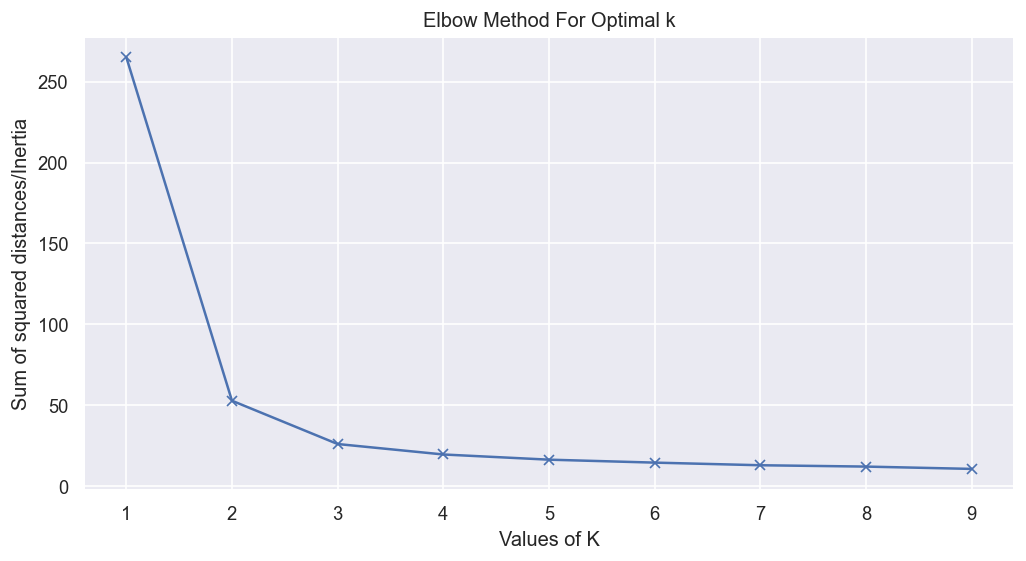

In [110]:
# Finding the optimum number of clusters for k-means classification

plt.figure(figsize=(10,5), dpi = 120)

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
# Plotting the results onto a line graph, 
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show()

The curve turned at 3 so as we will use The Elbow method to choose the number of clusters 
so n will equal 3

### Appling Kmeans Cluster Algorithm

In [115]:
# Applying kmeans to the dataset 
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)

In [ ]:
# Creating the kmeans classifier
y_kmeans = kmeans.fit_predict(x)

<a id='Ques'></a>


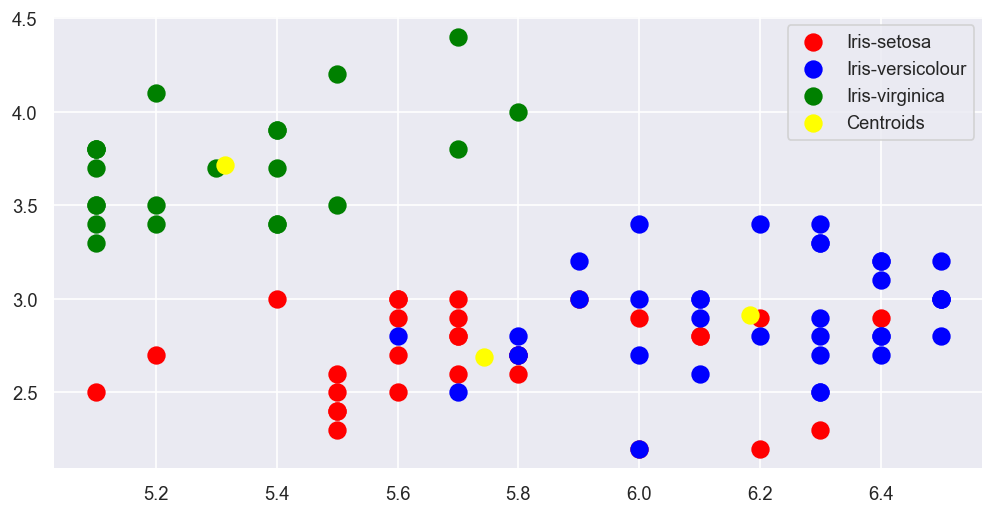

In [116]:
# Visualising the clusters
plt.figure(figsize=(10,5), dpi = 120)
ulabel=np.unique(y_kmeans)
labels=['Iris-setosa','Iris-versicolour','Iris-virginica']
colorss=['red','blue','green','yellow']
for i in range(len(ulabel)):
    plt.scatter(x[y_kmeans == ulabel[i] , 0] , x[y_kmeans == ulabel[i] , 1] , label = labels[i],
                s=100,c=colorss[i])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
             s=100,c = 'yellow', label = 'Centroids')
plt.legend()
plt.show()

In [117]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(x)
kmeans.inertia_

26.045015040106957